## Recommender systems
This notebook is to try out Suprise package to do recommender systerms.<br>
Data is from this Github repo: https://github.com/yash-rathi/recommendersystem.<br>

In [1]:
from surprise import KNNBaseline
from surprise import Dataset
from surprise import Reader
from surprise import get_dataset_dir
from surprise import SVD, evaluate
from surprise.model_selection import cross_validate
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# load data
df=pd.read_csv("data_books.csv", sep = ",", header=None, names=['Reviewer', 'Book', 'Rating'])
df.head()

,Reviewer,Book,Rating
0,276726,Rites of Passage,5
1,276729,Help!: Level 1,3
2,276729,The Amsterdam Connection : Level 4 (Cambridge ...,6
3,276744,A Painted House,7
4,276747,Little Altars Everywhere,9


In [3]:
# making sure "value" column is numeric
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383852 entries, 0 to 383851
Data columns (total 3 columns):
Reviewer    383852 non-null int64
Book        383852 non-null object
Rating      383852 non-null int64
dtypes: int64(2), object(1)
memory usage: 8.8+ MB


In [4]:
# check for missing values
df.isnull().sum()

Reviewer    0
Book        0
Rating      0
dtype: int64

In [5]:
# most viewed books
pd.value_counts(df.Book).head()

The Lovely Bones: A Novel     707
Wild Animus                   581
The Da Vinci Code             494
The Secret Life of Bees       406
The Nanny Diaries: A Novel    393
Name: Book, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x124a6b550>]],
      dtype=object)

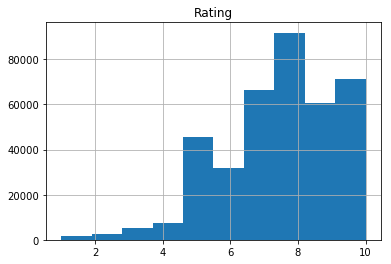

In [11]:
# check distribution of ratings
df.hist(column='Rating')

### 1. SVD algorithm

In [7]:
reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(df[['Reviewer', 'Book', 'Rating']], reader)
data

In [8]:
algo = SVD()
# Run 5-fold cross-validation and print results
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.6347  1.6326  1.6421  1.6324  1.6344  1.6352  0.0036  
MAE (testset)     1.2625  1.2590  1.2658  1.2569  1.2633  1.2615  0.0031  
Fit time          28.26   28.62   28.89   29.20   28.26   28.65   0.36    
Test time         1.06    0.99    0.80    0.76    0.75    0.87    0.13    


{'fit_time': (28.260478973388672,
  28.62289786338806,
  28.886572122573853,
  29.195369243621826,
  28.261662006378174),
 'test_mae': array([1.26251714, 1.25904018, 1.26578653, 1.25693078, 1.26325245]),
 'test_rmse': array([1.63470941, 1.63259613, 1.64213419, 1.63239446, 1.63436355]),
 'test_time': (1.0631189346313477,
  0.9942419528961182,
  0.7999989986419678,
  0.7611231803894043,
  0.7516458034515381)}

In [9]:
# Retrieve the trainset.
trainset = data.build_full_trainset()
algo.fit(trainset)

In [10]:
# Predict rating and compare to actual rating
Reviewer = str(276744)
Book = str('A Painted House')
actual_rating = 7
algo.predict(Reviewer, 302, 7)

Prediction(uid='276744', iid=302, r_ui=7, est=7.626710294592708, details={'was_impossible': False})